In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "C:/Users/Anthony Christian/Desktop/Common Apps/common_apps.csv"
df = pd.read_csv(file, index_col="App_Order")


In [3]:
#DATA INSPECTION

In [4]:
df.head()

,App_Name,App_Star,App_Price,App_Review
App_Order,,,,
0,iTunes,3.0,Free,30874.0
1,Netflix,4.0,Free,671575.0
2,Spotify Music,4.0,Free,31093.0
3,Microsoft Sticky Notes,4.5,Free,90236.0
4,Facebook,3.5,Free,481943.0


In [5]:
df.shape

(997, 4)

In [6]:
df.describe()

,App_Star,App_Review
count,972.000000,972.000000
mean,3.819959,12146.978395
std,0.815651,44772.828384
min,1.000000,1.000000
25%,3.500000,123.000000
50%,4.000000,781.000000
75%,4.500000,5290.000000
max,5.000000,671575.000000


In [7]:
df.dtypes

App_Name       object
App_Star      float64
App_Price      object
App_Review    float64
dtype: object

In [8]:
df.isnull().sum()

App_Name       0
App_Star      25
App_Price      0
App_Review    25
dtype: int64

In [9]:
df.loc[df["App_Star"].isnull()]

,App_Name,App_Star,App_Price,App_Review
App_Order,,,,
445,Random Color Generator,NaN,Free,NaN
527,Practica Musica,NaN,Free,NaN
586,Adobe Flash Player-Pro GUIDE,NaN,Free,NaN
596,Google Chrome App Guide,NaN,Free,NaN
686,Cricut Explore Air 2 Guides,NaN,$5.29,NaN
689,Publisher Expert 2,NaN,$5.29,NaN
695,DrawPad Professional,NaN,$5.29,NaN
738,eLation Reach,NaN,Free,NaN
747,CyberLink PowerDirector 18 Ultimate - Microsof...,NaN,Free,NaN


In [10]:
df.loc[df.duplicated()].shape

(90, 4)

In [11]:
#DATA CLEANING

In [12]:
df = df.rename(columns={"App_Name":"Nama","App_Star":"Bintang","App_Price":"Harga","App_Review":"Ulasan"})

In [13]:
df = df.dropna().drop_duplicates(subset="Nama")

In [14]:
df["Harga"] = df["Harga"].replace("Free", "0")

In [15]:
df["Harga"] = df["Harga"].str.lstrip("$")

In [16]:
df["Harga"] = pd.to_numeric(df["Harga"])

In [17]:
df["Ulasan"] = df["Ulasan"].astype(int)

In [18]:
df = df.set_index("Nama")

In [19]:
df.head(10)

,Bintang,Harga,Ulasan
Nama,,,
iTunes,3.0,0.0,30874
Netflix,4.0,0.0,671575
Spotify Music,4.0,0.0,31093
Microsoft Sticky Notes,4.5,0.0,90236
Facebook,3.5,0.0,481943
Instagram,3.0,0.0,99515
Hulu,3.0,0.0,28884
Messenger,3.0,0.0,291542
Your Phone,4.0,0.0,57147


In [20]:
df.describe() #Sudah berubah

,Bintang,Harga,Ulasan
count,881.000000,881.000000,881.000000
mean,3.810443,0.522395,11497.175936
std,0.829049,1.579051,44162.600672
min,1.000000,0.000000,1.000000
25%,3.500000,0.000000,102.000000
50%,4.000000,0.000000,693.000000
75%,4.500000,0.000000,4426.000000
max,5.000000,5.290000,671575.000000


In [21]:
df.dtypes

Bintang    float64
Harga      float64
Ulasan       int32
dtype: object

In [22]:
df.isnull().sum()

Bintang    0
Harga      0
Ulasan     0
dtype: int64

In [23]:
#Exploratory Data Analysis
#Top 10 most viewed apps

In [24]:
top_10_apps = df.sort_values(by="Ulasan", ascending=False).head(10)
print(top_10_apps)

                                     Bintang  Harga  Ulasan
Nama                                                       
Netflix                                  4.0    0.0  671575
Facebook                                 3.5    0.0  481943
Phototastic Collage                      4.5    0.0  411556
LINE                                     3.5    0.0  339031
OneNote                                  4.5    0.0  325916
Paint 3D                                 4.5    0.0  313103
Messenger                                3.0    0.0  291542
Duolingo - Learn Languages for Free      4.5    0.0  289946
Translator                               4.0    0.0  220199
Twitter                                  3.5    0.0  211995


Text(0, 0.5, 'ULASAN IN THOUSAND')

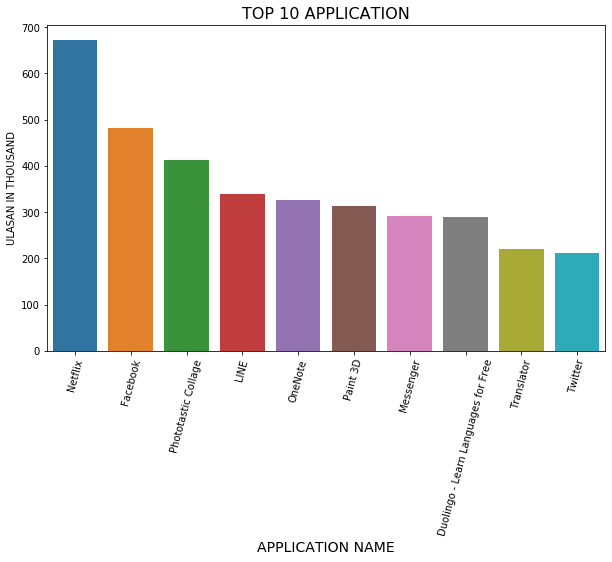

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_apps.index, y=top_10_apps["Ulasan"]/1000)
plt.title("TOP 10 APPLICATION", fontsize=16)
plt.xlabel("APPLICATION NAME", fontsize=14)
plt.xticks(rotation=75)
plt.ylabel("ULASAN IN THOUSAND")

In [26]:
#Top 10 most often viewed 5.0 Star apps
top_10_mostview = df.sort_values(by=["Bintang","Ulasan"], ascending=False).head(10)
print(top_10_mostview)

                                                    Bintang  Harga  Ulasan
Nama                                                                      
OMEN Command Center                                     5.0   0.00   17860
Cartoons Unlimited Pro                                  5.0   5.29   17812
PDF X                                                   5.0   0.00   15876
Pinterest                                               5.0   0.00    8467
Logo Maker - Logo Creator, Generator &amp; Desi...      5.0   0.00    5272
Free Movies # HD                                        5.0   0.00    2863
AdBlocker Ultimate                                      5.0   0.00    2605
Ultimate Photo Editor                                   5.0   0.00    2060
Poster Maker, Flyer Designer, Ads Page Designer         5.0   0.00    1963
Duplicates Cleaner Prime                                5.0   5.29    1845


Text(0, 0.5, 'ULASAN IN THOUSAND')

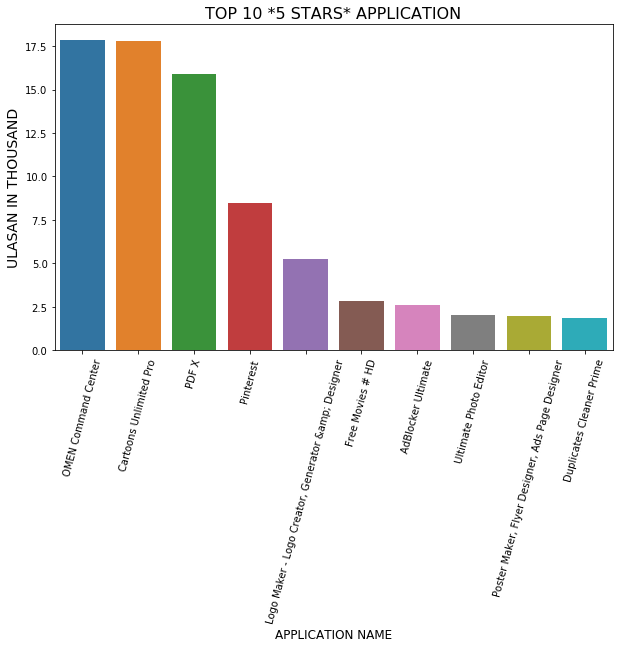

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_mostview.index, y=top_10_mostview["Ulasan"]/1000)
plt.title("TOP 10 *5 STARS* APPLICATION", fontsize=16)
plt.xlabel("APPLICATION NAME", fontsize=12)
plt.xticks(rotation=75)
plt.ylabel("ULASAN IN THOUSAND", fontsize="14")

In [28]:
#Top 10 most often viewed non_fee_apps:
top_10_nonfree = df.sort_values(by=["Harga","Ulasan"], ascending=False).head(10)
print(top_10_nonfree)

                                                    Bintang  Harga  Ulasan
Nama                                                                      
Pages Manager for Facebook                              3.5   5.29   61093
Cartoons Unlimited Pro                                  5.0   5.29   17812
Nextgen Reader                                          4.5   5.29   16986
8 Zip Pro - advanced archiver for Zip, Rar, 7Zi...      4.5   5.29   16890
Video Maker - VideoShow                                 4.0   5.29   16755
Fotor                                                   4.0   5.29   16204
Spending Tracker ™                                      4.5   5.29   14189
Text Reader                                             4.0   5.29    6879
Sketch Board                                            4.0   5.29    6333
Online Radio - Free Live FM AM                          4.5   5.29    6014


Text(0, 0.5, 'ULASAN IN THOUSAND')

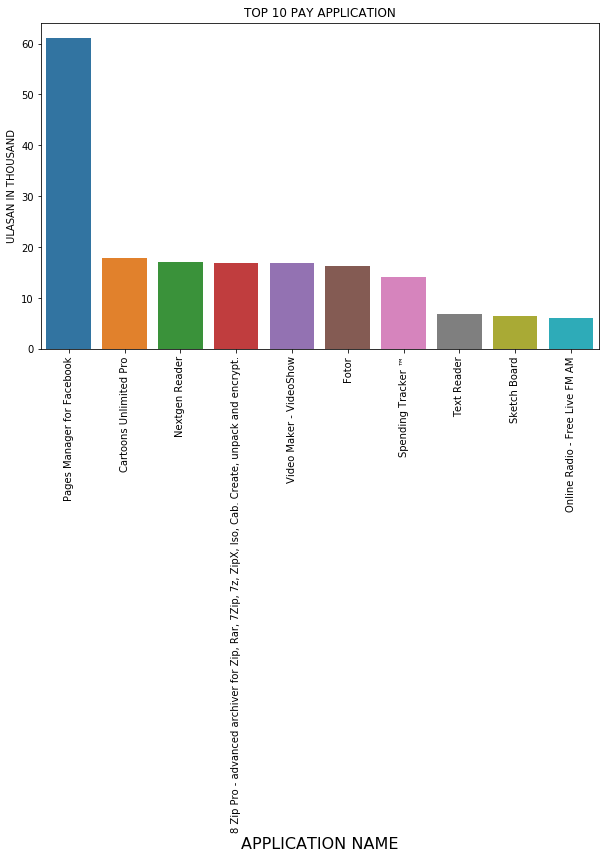

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_nonfree.index,y=top_10_nonfree["Ulasan"]/1000)
plt.title("TOP 10 PAY APPLICATION")
plt.xlabel("APPLICATION NAME", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("ULASAN IN THOUSAND")

In [30]:
#Star rating distribution
star_rating = df["Bintang"].value_counts()
print(star_rating)

4.0    254
4.5    247
3.5    152
3.0     85
5.0     53
2.5     39
2.0     23
1.0     16
1.5     12
Name: Bintang, dtype: int64


Text(0, 0.5, 'TOTAL STAR')

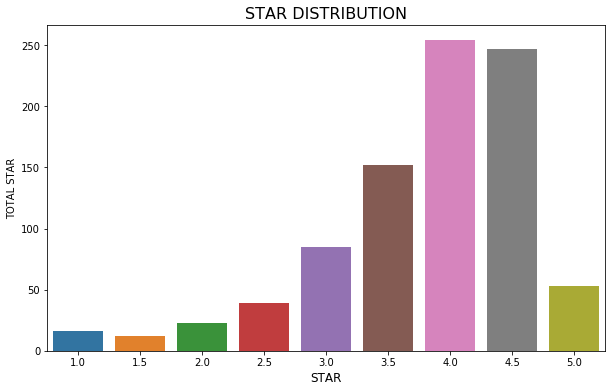

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=star_rating.index,y=star_rating.values)
plt.title("STAR DISTRIBUTION", fontsize=16)
plt.xlabel("STAR", fontsize=12)
plt.ylabel("TOTAL STAR", fontsize=10)

In [32]:
#Differences between free and non free apps:
free_apps = df[df["Harga"] == 0]
non_free_apps = df[df["Harga"] > 0]

Text(0, 0.5, 'STAR')

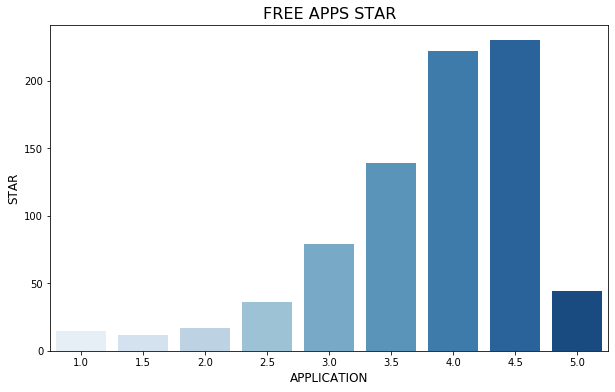

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=free_apps["Bintang"].value_counts().index, y=free_apps["Bintang"].value_counts().values, palette="Blues")
plt.title("FREE APPS STAR", fontsize=16)
plt.xlabel("APPLICATION", fontsize=12)
plt.ylabel("STAR", fontsize=12)

Text(0, 0.5, 'STAR')

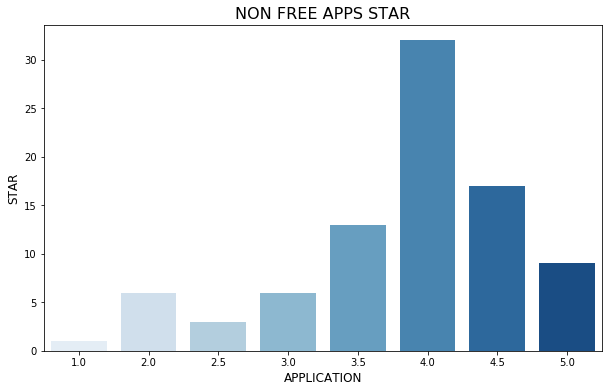

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=non_free_apps["Bintang"].value_counts().index, y=non_free_apps["Bintang"].value_counts().values, palette="Blues")
plt.title("NON FREE APPS STAR", fontsize=16)
plt.xlabel("APPLICATION", fontsize=12)
plt.ylabel("STAR", fontsize=12)

In [35]:
free_apps.describe()

,Bintang,Harga,Ulasan
count,794.000000,794.0,794.000000
mean,3.807935,0.0,12459.289673
std,0.828983,0.0,46353.314245
min,1.000000,0.0,1.000000
25%,3.500000,0.0,109.500000
50%,4.000000,0.0,747.000000
75%,4.500000,0.0,5132.750000
max,5.000000,0.0,671575.000000


In [36]:
non_free_apps.describe()

,Bintang,Harga,Ulasan
count,87.000000,8.700000e+01,87.000000
mean,3.833333,5.290000e+00,2716.505747
std,0.834108,7.146619e-15,7616.526051
min,1.000000,5.290000e+00,1.000000
25%,3.500000,5.290000e+00,62.000000
50%,4.000000,5.290000e+00,264.000000
75%,4.500000,5.290000e+00,1583.500000
max,5.000000,5.290000e+00,61093.000000


In [37]:
free_apps["Ulasan"].sum()

9892676

In [38]:
non_free_apps["Ulasan"].sum()

236336

In [39]:
#Correlation between stars and views

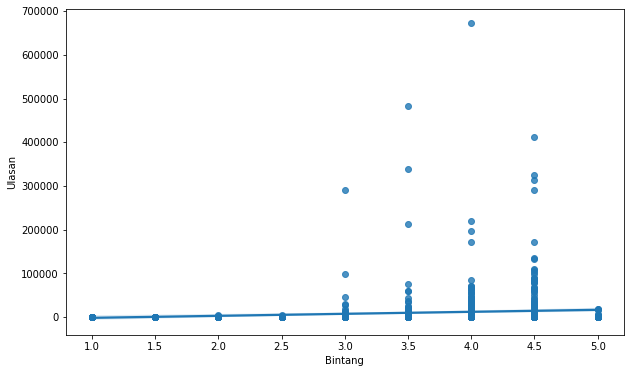

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(x=df["Bintang"], y=df["Ulasan"])

(0, 50000)

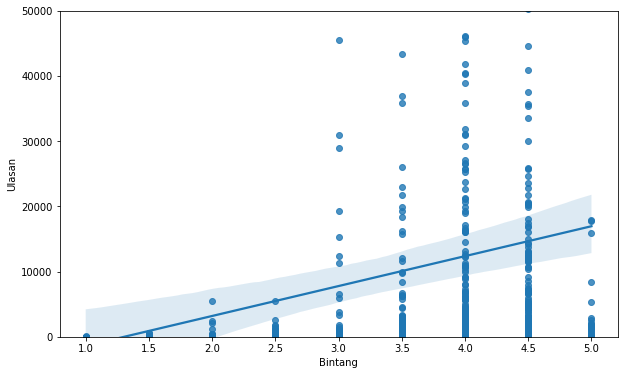

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(x=df["Bintang"], y=df["Ulasan"])
plt.gca().set_ylim(0, 50000)

(0, 50000)

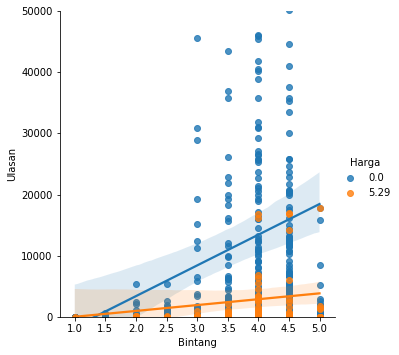

In [42]:
sns.lmplot(x="Bintang", y="Ulasan", hue="Harga", data=df)
plt.gca().set_ylim(0, 50000)